In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [372]:
from google.colab import files
uploaded = files.upload()

Saving user_reviews.csv to user_reviews (1).csv


In [8]:
df = pd.read_csv('user_reviews.csv')
df.head()

,grade,user_name,text,date
0,4,mds27272,My gf started playing before me. No option to ...,2020-03-20
1,5,lolo2178,"While the game itself is great, really relaxin...",2020-03-20
2,0,Roachant,My wife and I were looking forward to playing ...,2020-03-20
3,0,Houndf,We need equal values and opportunities for all...,2020-03-20
4,0,ProfessorFox,BEWARE! If you have multiple people in your h...,2020-03-20


In [9]:
df['length'] = df['text'].apply(len)
df.head()

,grade,user_name,text,date,length
0,4,mds27272,My gf started playing before me. No option to ...,2020-03-20,381
1,5,lolo2178,"While the game itself is great, really relaxin...",2020-03-20,927
2,0,Roachant,My wife and I were looking forward to playing ...,2020-03-20,1000
3,0,Houndf,We need equal values and opportunities for all...,2020-03-20,277
4,0,ProfessorFox,BEWARE! If you have multiple people in your h...,2020-03-20,979


In [0]:
df['date'] = pd.to_datetime(df['date'])

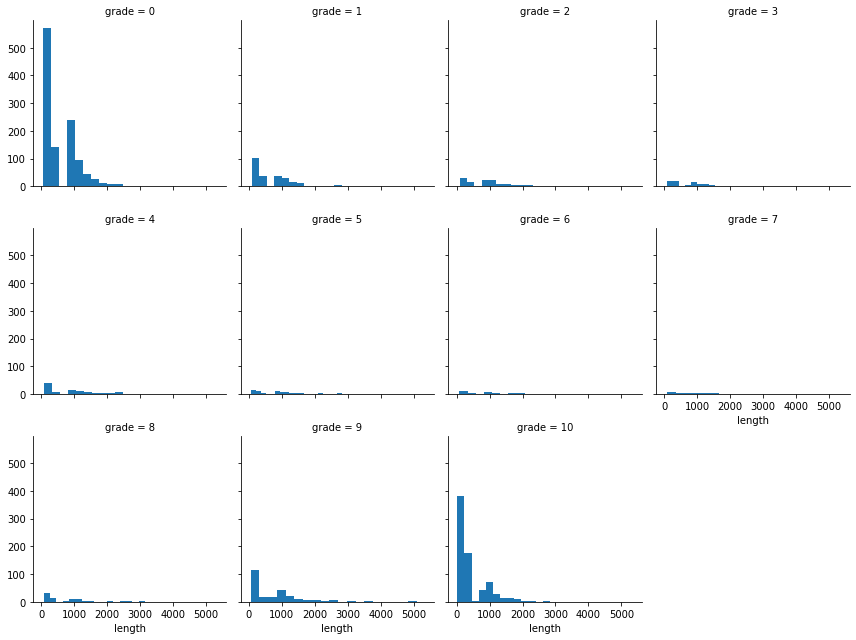

In [11]:
g = sns.FacetGrid(df,col='grade', col_wrap=4)
g.map(plt.hist, 'length', bins=20)
plt.show()

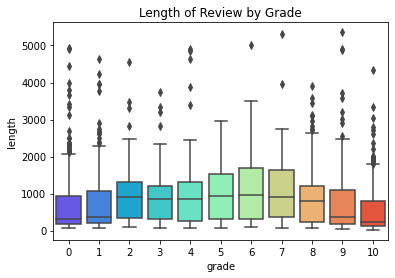

In [12]:
sns.boxplot(x='grade',y='length',data=df,palette='rainbow')
plt.title('Length of Review by Grade')
plt.show()

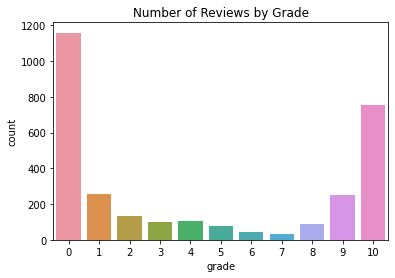

In [13]:
sns.countplot(x='grade',data=df)
plt.title('Number of Reviews by Grade')
plt.show()

In [14]:
df.groupby(['grade']).mean()

,length
grade,
0,589.468048
1,770.262745
2,983.931298
3,913.051020
4,987.180952
5,1025.166667
6,1223.340909
7,1206.000000
8,939.901099


In [15]:
df.length.describe()

count    2999.000000
mean      665.030010
std       712.653434
min        18.000000
25%       169.000000
50%       322.000000
75%       990.000000
max      5358.000000
Name: length, dtype: float64

In [16]:
df[df['length'] == 5358]['text'].iloc[0]

"I'm going to start this review by saying Animal Crossing New Horizons is the best entry in the series. There is no doubt in my mind. The creativity and attention to detail that was put in by the developers is nothing short than inspiring. There is a part of me that is genuinely concerned for the future of the series, not for anything bad for the game, but for how much it has to offer.I'm going to start this review by saying Animal Crossing New Horizons is the best entry in the series. There is no doubt in my mind. The creativity and attention to detail that was put in by the developers is nothing short than inspiring. There is a part of me that is genuinely concerned for the future of the series, not for anything bad for the game, but for how much it has to offer. Where else can they go? The next installment is going to be something I'm afraid of. They might not even come out with one and just update this gem of creativity. I'm afraid I'm not explaining enough, but what I mean is that

In [0]:
date_list=[]
for i in sorted(df['grade'].unique()):
  date = df[df['grade'] == i]
  date_list.append(date)

In [0]:
dates=[]
list_range = len(date_list)
for i in range(list_range):
  temp = date_list[i]
  temp = temp[['grade','date']]
  temp2 = temp.groupby('date').count()
  temp2['grades'] = i
  dates.append(temp2)

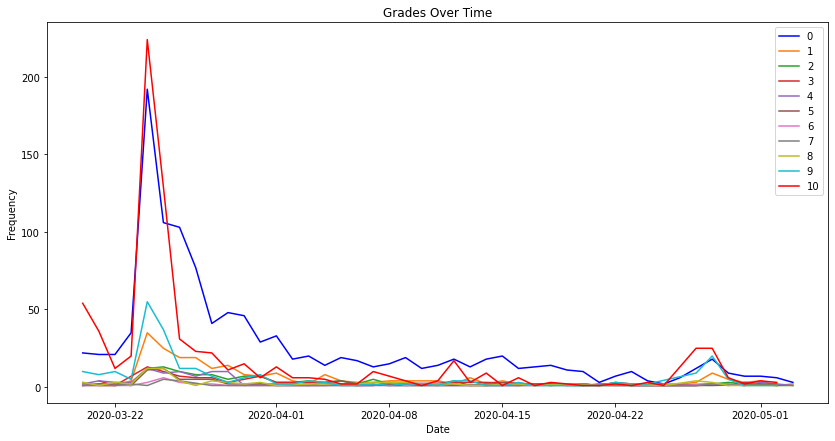

In [19]:
fig = plt.figure(figsize=(14, 7))
ax1 = fig.add_subplot(1,1,1)

ax1.plot(dates[0]['grade'],c='b', label='0')
ax1.plot(dates[1]['grade'],c='C1', label='1')
ax1.plot(dates[2]['grade'],c='C2', label='2')
ax1.plot(dates[3]['grade'],c='C3', label='3')
ax1.plot(dates[4]['grade'],c='C4', label='4')
ax1.plot(dates[5]['grade'],c='C5', label='5')
ax1.plot(dates[6]['grade'],c='C6', label='6')
ax1.plot(dates[7]['grade'],c='C7', label='7')
ax1.plot(dates[8]['grade'],c='C8', label='8')
ax1.plot(dates[9]['grade'],c='C9', label='9')
ax1.plot(dates[10]['grade'],c='r', label='10')
ax1.set_title('Grades Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Frequency')
ax1.legend(loc='upper right', scatterpoints=1)
plt.show()

In [0]:
import nltk
from nltk.corpus import stopwords

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
import spacy
from collections import Counter
nlp = spacy.load('en_core_web_sm')

In [0]:
tok_words = []
df_len = len(df)
for i in range(df_len):
  doc = nlp(df['text'][i])
  words = [token.text for token in doc if token.is_stop != True and token.is_punct != True and token.is_digit != True]
  tok_words = tok_words + words

In [24]:
len(tok_words)

158836

In [25]:
tok = pd.DataFrame(tok_words)
tok = tok[tok[0] != ' ']
tok = tok[0]
val_counts = tok.value_counts()
val_counts[:50,]

game           8777
island         3814
play           2160
player         1804
Nintendo       1585
switch         1463
console        1414
like           1309
Expand         1275
people          969
time            952
new             919
Animal          887
experience      882
playing         882
Crossing        869
buy             794
want            768
games           747
fun             745
Switch          707
second          609
person          595
great           586
multiple        577
multiplayer     576
players         575
way             569
progress        553
things          536
family          530
review          527
New             509
crossing        509
share           497
animal          488
played          473
good            457
islands         424
able            412
enjoy           399
series          398
day             386
lot             374
love            371
fact            362
bought          360
save            356
system          354
thing           350


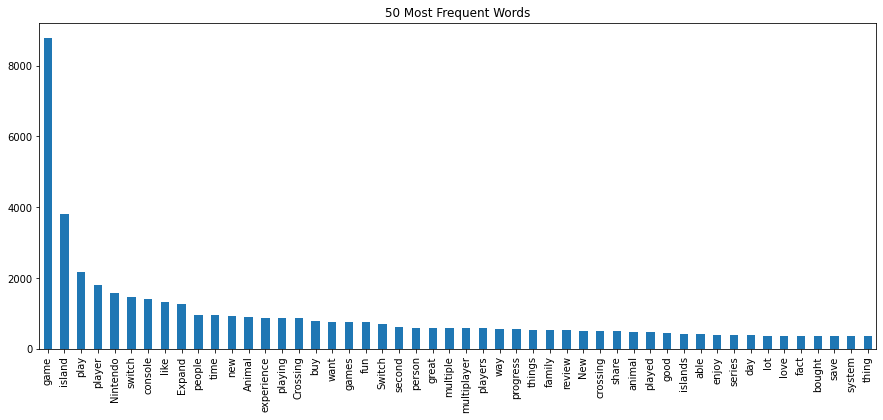

In [80]:
plt.figure(figsize=(15,6))
val_counts[:50,].plot.bar()
plt.title('50 Most Frequent Words')
plt.show()

In [0]:
grade_list=[]
for i in sorted(df['grade'].unique()):
  grade = df[df['grade'] == i]
  grade_list.append(grade)

grades=[]
list_range = len(grade_list)
for i in range(list_range):
  tok_grades = []
  temp = grade_list[i]
  temp = temp[['grade','text']]
  df_len = len(temp)
  for n in range(df_len):
    doc = nlp(temp['text'].iloc[n])
    words = [token.text for token in doc if token.is_stop != True and token.is_punct != True and token.is_digit != True]
    tok_grades = tok_grades + words
  grades.append(tok_grades)

In [0]:
list_range_tok = len(grades)
list_val_counts = []
for i in range(list_range_tok):
  tok_temp = pd.DataFrame(grades[i])
  tok_temp = tok_temp[tok_temp[0] != ' ']
  tok_temp = tok_temp[0]
  val_counts_temp = tok_temp.value_counts()[:30,]
  val_counts_df = pd.DataFrame(val_counts_temp)
  list_val_counts.append(val_counts_df)

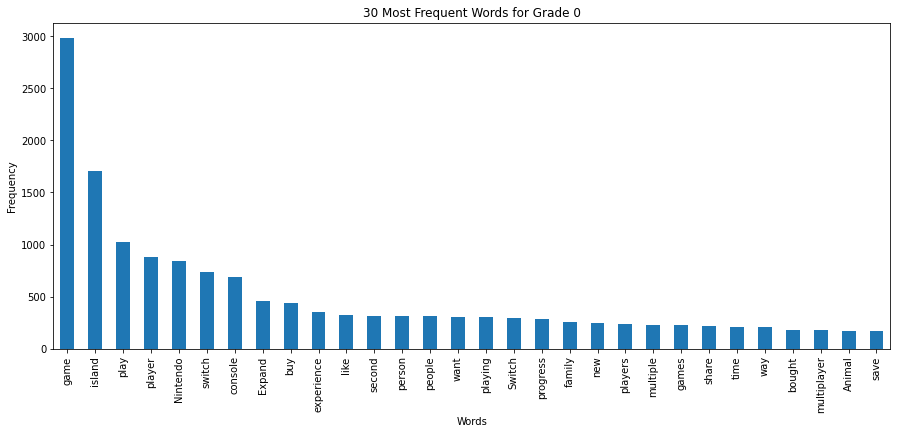

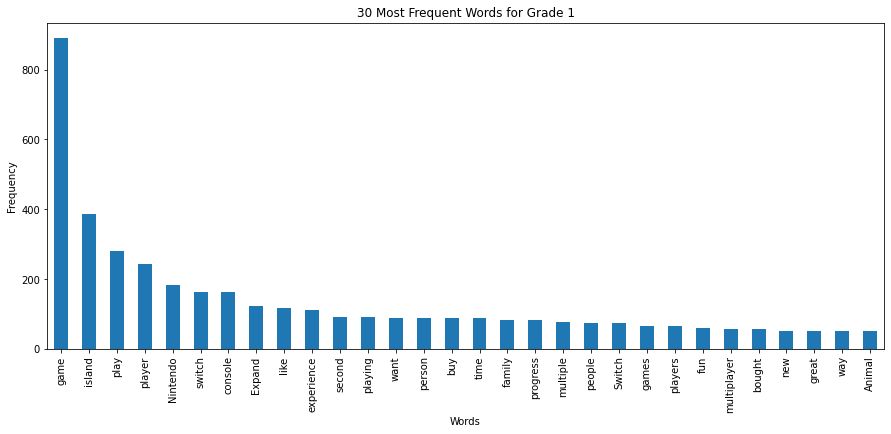

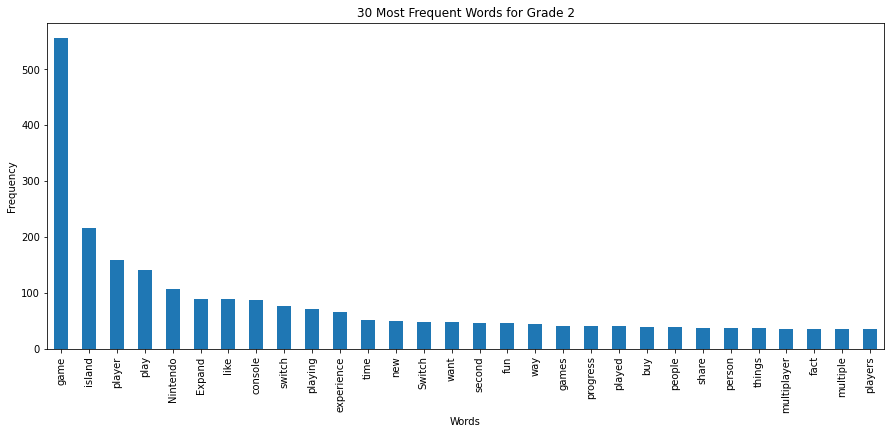

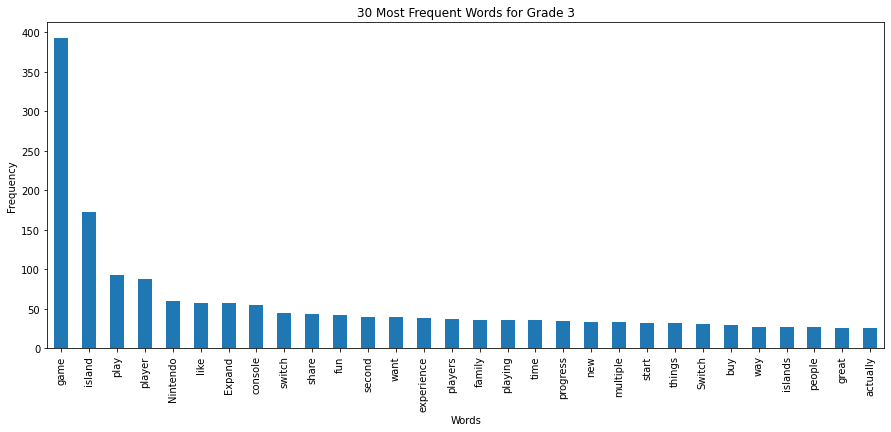

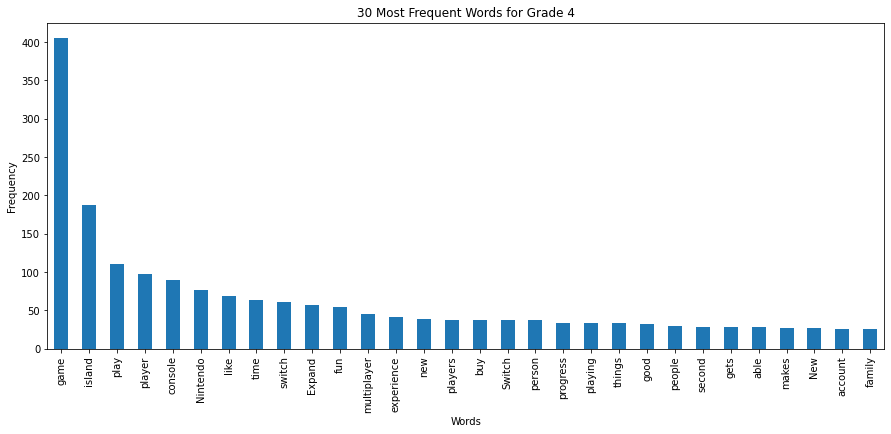

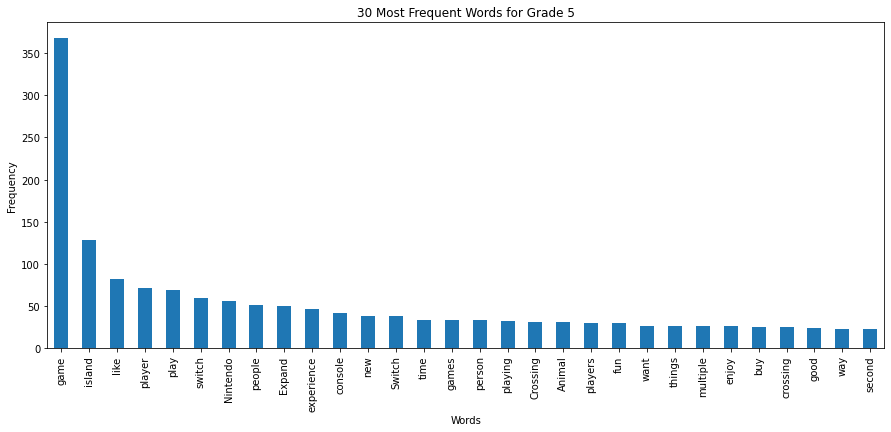

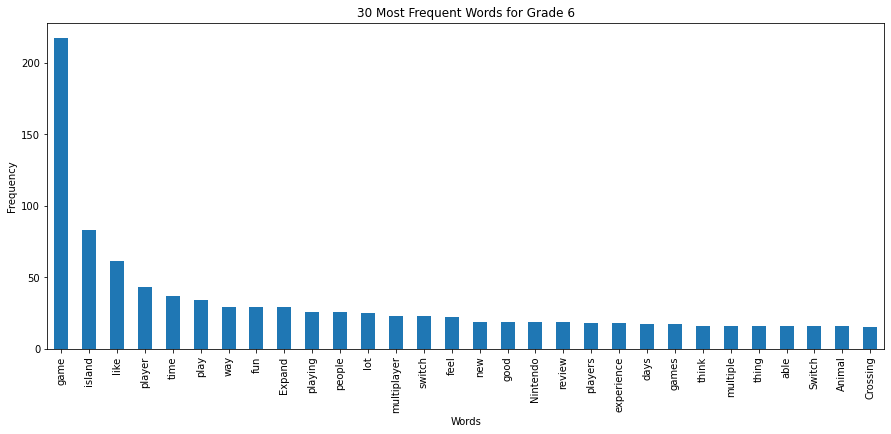

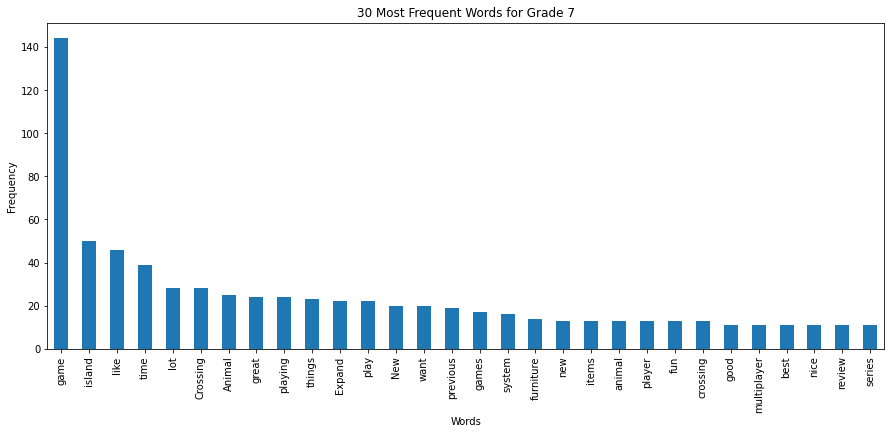

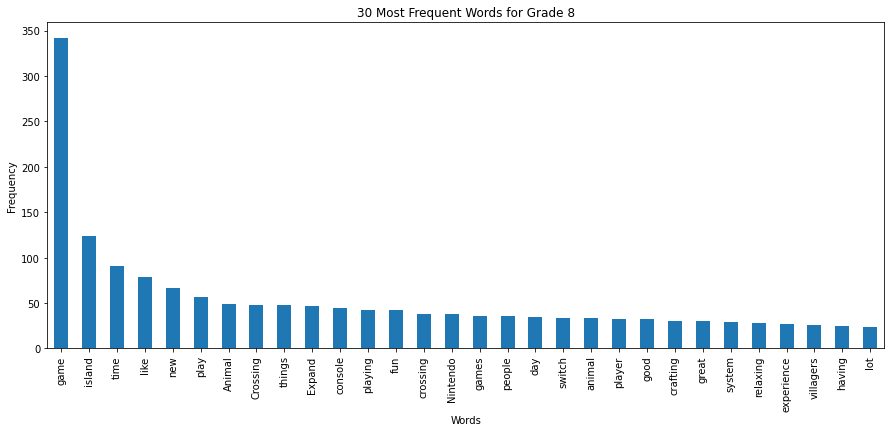

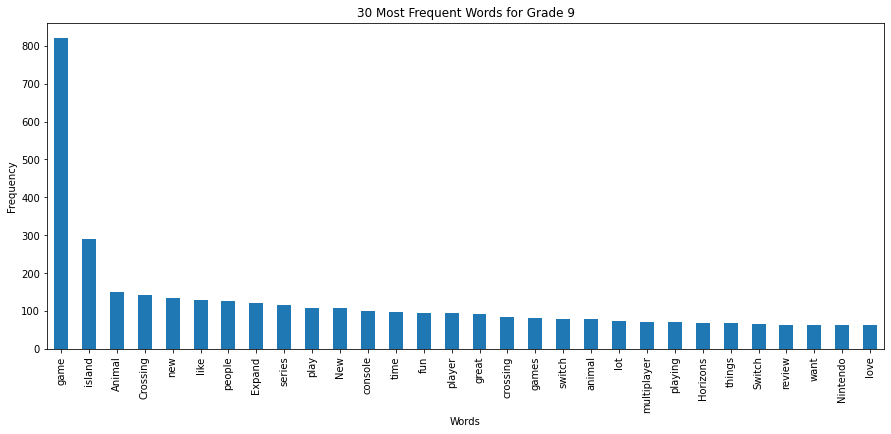

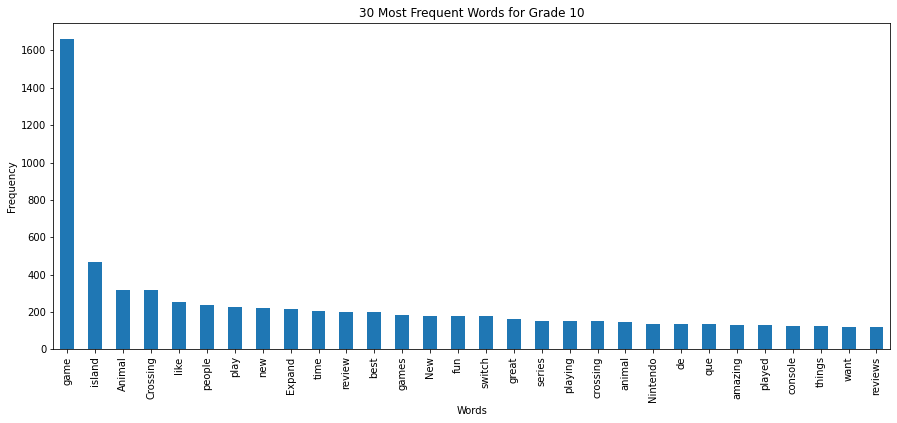

In [79]:
def plotGrade(grade):
  grades = list_val_counts[grade]
  grades.plot.bar()
  plt.gcf().set_size_inches(15, 6)
  plt.title('30 Most Frequent Words for Grade '+str(grade))
  plt.xlabel('Words')
  plt.ylabel('Frequency')
  legend = plt.legend(loc='upper right', scatterpoints=1)
  legend.remove()
  plt.show()

for grade in range(0,11,1):
    plotGrade(grade)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [0]:
cv=CountVectorizer(stop_words=stopwords.words('english'))
word_count_vector=cv.fit_transform(df['text'])

In [34]:
tfidf = TfidfTransformer()
tfidf.fit(word_count_vector)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [0]:
def listToString(s):  
    str1 = " "  
    return (str1.join(s)) 

In [0]:
doc=listToString(tok_words)
tf_idf_vector=tfidf.transform(cv.transform([doc]))

In [0]:
feature_names=cv.get_feature_names()

In [0]:
tfidf_all = pd.DataFrame(tf_idf_vector.T.todense(), index=feature_names,columns=['tfidf']).sort_values(by=['tfidf'],ascending=False)

<Figure size 1080x432 with 0 Axes>

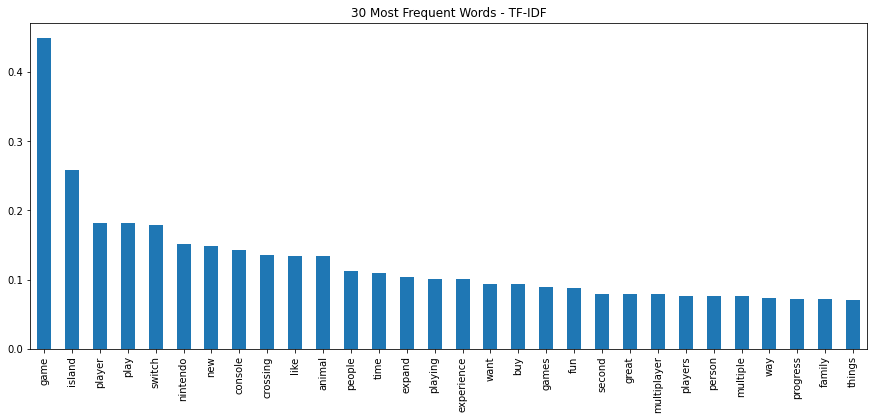

In [59]:
tfidf_all[:30].plot.bar()
plt.title('30 Most Frequent Words - TF-IDF')
plt.gcf().set_size_inches(15, 6)
legend = plt.legend(loc='upper right', scatterpoints=1)
legend.remove()
plt.show()

In [0]:
list_range_tok = len(grades)
list_val_tfidf = []
for i in range(list_range_tok):
  word_count_vector=cv.fit_transform(grades[i])
  tfidf.fit(word_count_vector)
  feature_names=cv.get_feature_names()
  doc=listToString(grades[i])
  tf_idf_vector=tfidf.transform(cv.transform([doc]))
  keywords_tfidf = pd.DataFrame(tf_idf_vector.T.todense(),index=feature_names,columns=['tfidf']).sort_values(by=['tfidf'],ascending=False)
  list_val_tfidf.append(keywords_tfidf)

In [0]:
def plotGradeTFIDF(i):
  grades = list_val_tfidf[i]
  pd.DataFrame(grades)[:30].plot.bar()
  plt.gcf().set_size_inches(15, 6)
  plt.title('30 Most Frequent Words TF-IDF for Grade '+str(i))
  plt.xlabel('Words')
  plt.ylabel('Frequency')
  legend = plt.legend(loc='upper right', scatterpoints=1)
  legend.remove()
  plt.show()

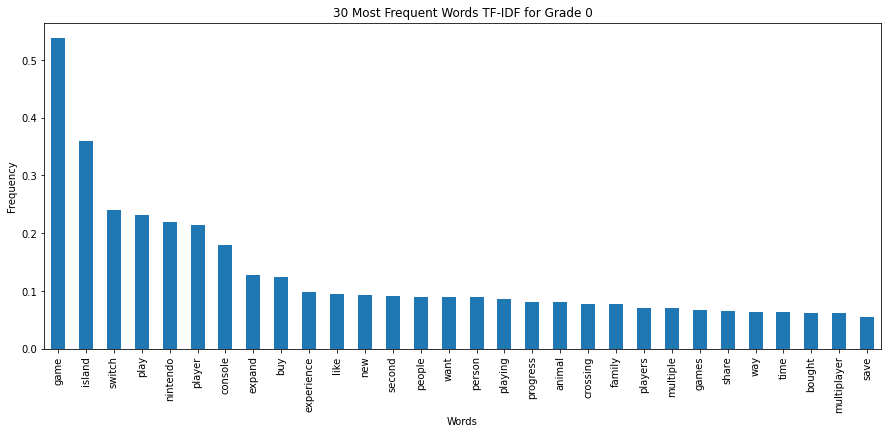

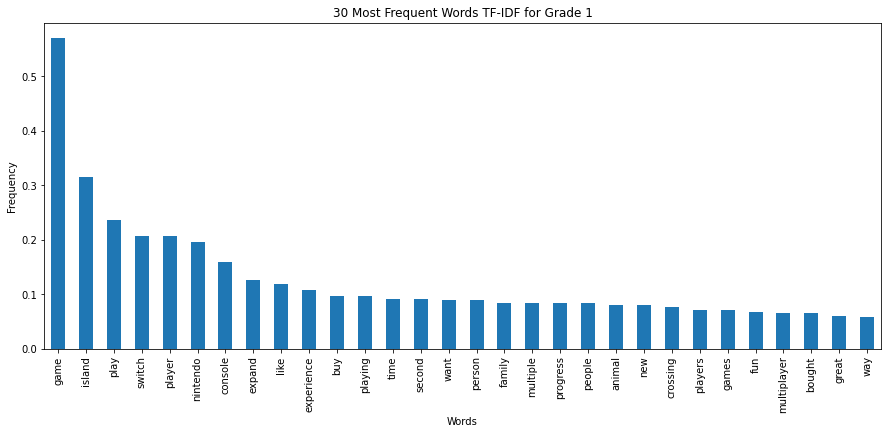

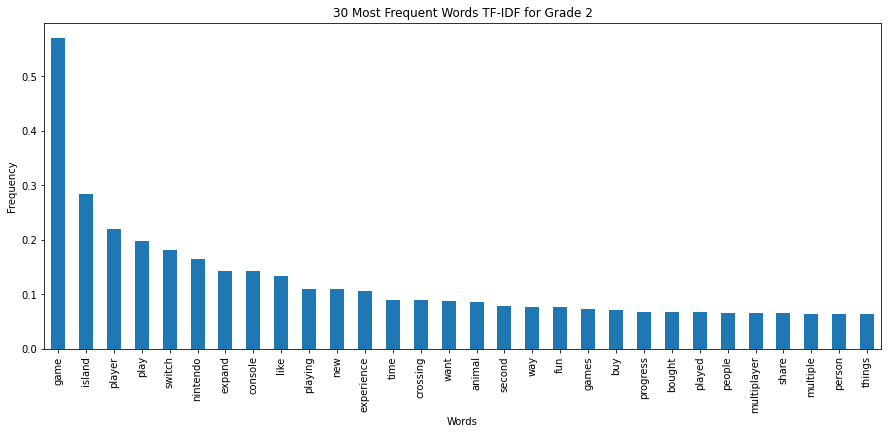

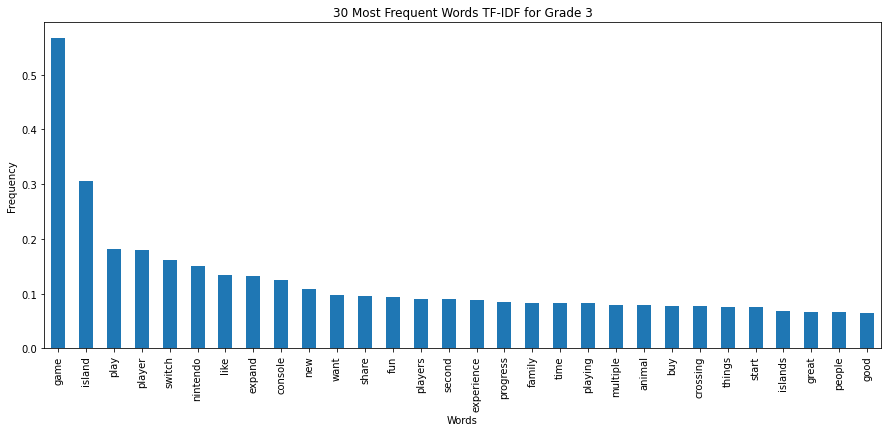

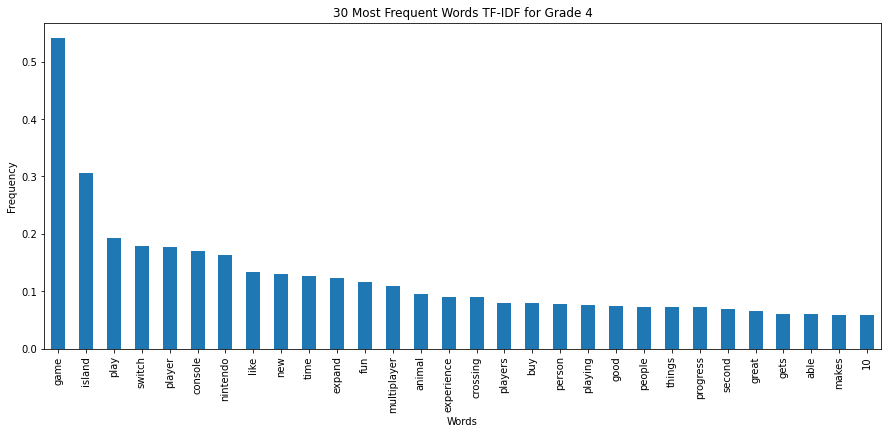

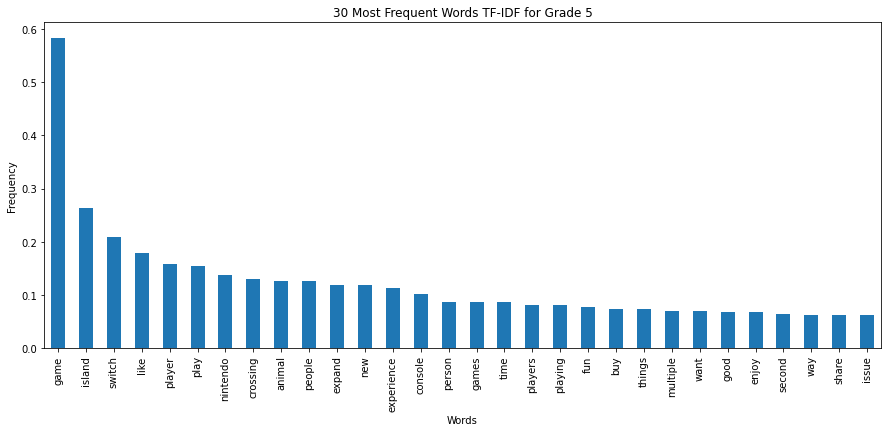

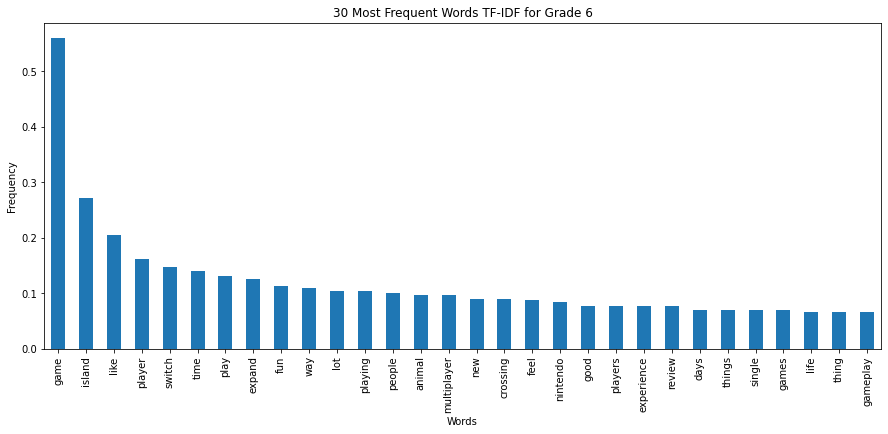

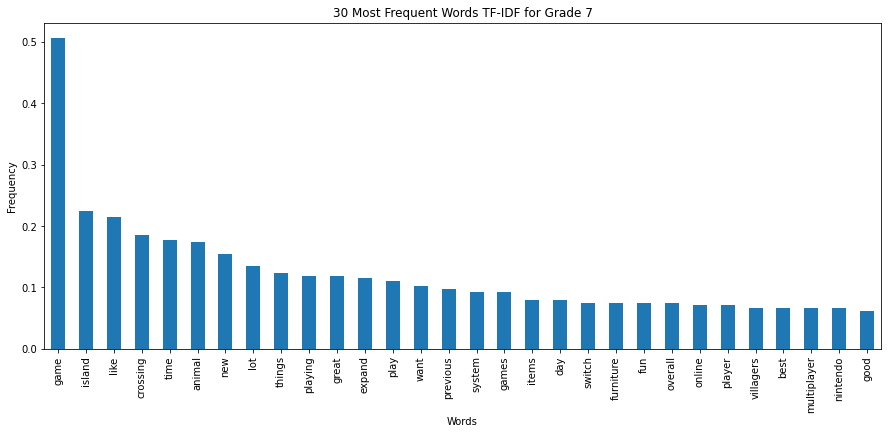

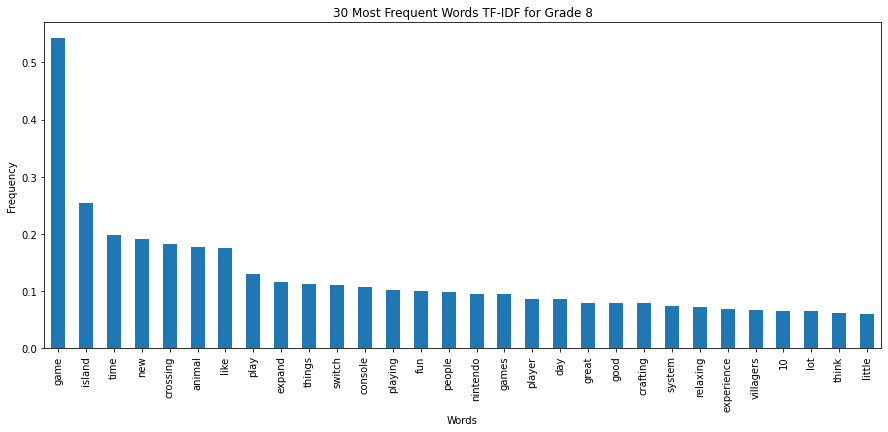

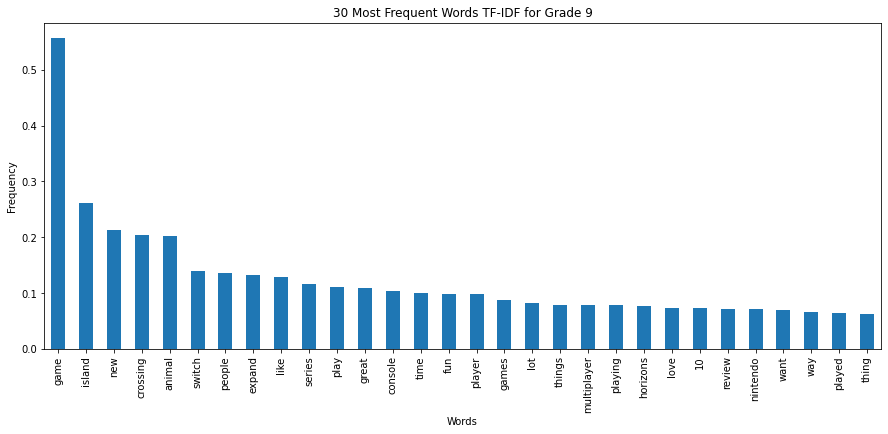

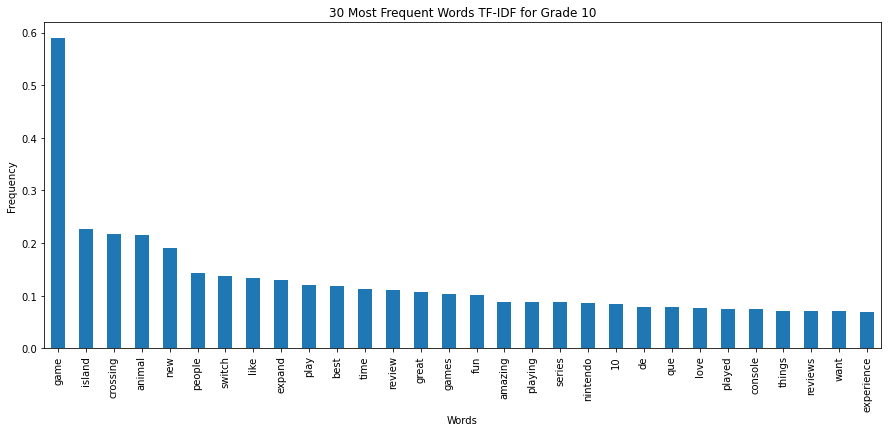

In [78]:
for i in range(0,11,1):
    plotGradeTFIDF(i)